In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import models, layers, utils

In [2]:
print(tf.__version__)

2.0.0


In [329]:
data = pd.read_csv('iris.csv')

In [330]:
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [331]:
data = shuffle(data)
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
9,4.9,3.1,1.5,0.1,Setosa
120,6.9,3.2,5.7,2.3,Virginica
99,5.7,2.8,4.1,1.3,Versicolor
40,5.0,3.5,1.3,0.3,Setosa
85,6.0,3.4,4.5,1.6,Versicolor


In [332]:
#converting into numpy array
df = data.values
print(df.dtype)
#print(df)


object


In [333]:
df.shape

(150, 5)

## FOR BREAKING IN 2 (TRAINING AND TESTING)

In [188]:
train_inputs = df[:105,:4].astype('float32')  #70%training
train_labels = df[:105,4]
test_inputs  = df[105:,:4].astype('float32') #30% testing
test_labels  = df[105:,4]

In [189]:
train_inputs.shape

(105, 4)

In [190]:
train_labels.shape

(105,)

In [191]:
test_inputs.shape

(45, 4)

In [192]:
#encoding labels
le = LabelEncoder()
encoded_train_labels = le.fit_transform(train_labels)
print(encoded_train_labels)


encoded_test_labels = le.fit_transform(test_labels)
print(encoded_test_labels)

[0 1 0 1 0 2 2 2 2 1 2 1 1 0 1 2 0 1 2 0 0 1 1 0 2 0 0 1 1 0 1 1 2 0 1 1 2
 1 2 2 1 2 0 2 2 1 2 1 0 0 1 1 2 1 0 1 1 2 0 0 0 0 2 1 2 0 2 0 2 0 0 0 2 1
 1 0 0 2 0 2 2 2 1 1 2 0 1 0 2 1 1 2 0 2 2 0 1 2 2 2 1 1 2 0 2]
[0 1 1 1 1 0 0 1 0 1 0 2 0 0 0 2 2 0 1 0 0 1 2 2 0 0 1 0 2 0 2 2 2 1 0 2 2
 1 1 2 1 1 0 1 2]


In [193]:
#one hot encoding
onehot_encoded_trainlabels = utils.to_categorical(encoded_train_labels)
onehot_encoded_testlabels = utils.to_categorical(encoded_test_labels)

In [194]:
print(le.classes_)

['Setosa' 'Versicolor' 'Virginica']


In [195]:
onehot_encoded_trainlabels[0]

array([1., 0., 0.], dtype=float32)

In [196]:
#building model
model = models.Sequential()
model.add(layers.Dense(8, activation = 'relu', input_shape=(4,)))
model.add(layers.Dense(3, activation = 'softmax'))

In [197]:
#compiling
model.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', metrics = ['acc'])

In [200]:
history = model.fit(train_inputs , onehot_encoded_trainlabels , epochs = 70, batch_size = 4 )

Train on 105 samples
Epoch 1/70
105/105 [==============================] - 0s 570us/sample - loss: 0.5353 - acc: 0.9333
Epoch 2/70
105/105 [==============================] - 0s 494us/sample - loss: 0.5281 - acc: 0.9143
Epoch 3/70
105/105 [==============================] - 0s 456us/sample - loss: 0.5217 - acc: 0.9333
Epoch 4/70
105/105 [==============================] - 0s 437us/sample - loss: 0.5148 - acc: 0.9333
Epoch 5/70
105/105 [==============================] - 0s 418us/sample - loss: 0.5062 - acc: 0.9238
Epoch 6/70
105/105 [==============================] - 0s 484us/sample - loss: 0.5005 - acc: 0.9429
Epoch 7/70
105/105 [==============================] - 0s 532us/sample - loss: 0.4924 - acc: 0.9333
Epoch 8/70
105/105 [==============================] - 0s 475us/sample - loss: 0.4847 - acc: 0.9524
Epoch 9/70
105/105 [==============================] - 0s 475us/sample - loss: 0.4787 - acc: 0.9333
Epoch 10/70
105/105 [==============================] - 0s 465us/sample - loss: 0.4715 - 

In [201]:
result = model.evaluate(test_inputs , onehot_encoded_testlabels)

45/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [210]:
result

[0.24110334051979912, 0.95555556]

## GRAPH

In [182]:
%matplotlib inline
import matplotlib.pyplot as plt

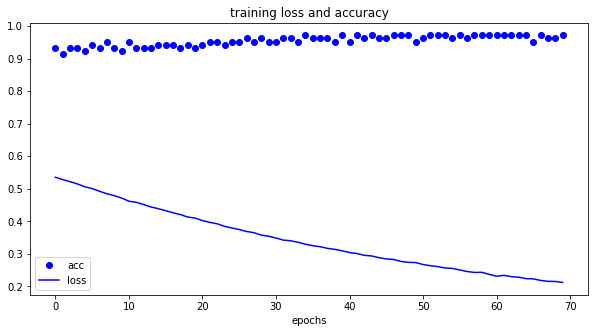

In [211]:
plt.figure(figsize = (10,5))
plt.plot(history.history['acc'],'bo')
plt.plot(history.history['loss'],'b')
plt.title('training loss and accuracy')
plt.xlabel('epochs')
plt.legend(['acc','loss'])
plt.show()

## prediction

In [90]:

i=3
prediction = model.predict_classes(test_inputs[i].reshape(1,4))

In [91]:
#checking
if prediction == 0:
    print(f'Data = {test_inputs[i]} => Prediction = Setosa => Actual label = {test_labels[i]}')
elif prediction == 1:
    print(f'Data = {test_inputs[i]} => Prediction = Versicolor => Actual label = {test_labels[i]}')
else:
     print(f'Data = {test_inputs[i]} => Prediction = Virginica => Actual label = {test_labels[i]}')

Data = [5.  3.3 1.4 0.2] => Prediction = Setosa => Actual label = Setosa


# FOR BREAKING IN 3 (TRAINING, TESTING AND VALIDATION)

In [334]:
train_inputs = df[:75,:4].astype('float32')  #50%training
train_labels = df[:75,4]
test_inputs  = df[75:128,:4].astype('float32') #30% testing
test_labels  = df[75:128,4]
val_inputs  = df[128:,:4].astype('float32') #20% validation
val_labels  = df[128:,4]

In [335]:
train_inputs.shape

(75, 4)

In [336]:
val_inputs.shape

(22, 4)

In [337]:
test_inputs.shape

(53, 4)

In [338]:
#encoding labels
le = LabelEncoder()
encoded_train_labels = le.fit_transform(train_labels)
print(encoded_train_labels)


encoded_test_labels = le.fit_transform(test_labels)
print(encoded_test_labels)

encoded_val_labels = le.fit_transform(val_labels)
print(encoded_val_labels)

[0 2 1 0 1 2 2 2 2 0 2 2 1 0 2 1 2 0 0 2 0 1 2 1 1 0 1 0 1 0 2 2 1 0 2 0 1
 1 0 0 0 0 0 0 1 0 1 2 2 2 2 0 1 1 1 1 2 2 2 2 0 2 1 1 0 0 2 1 1 2 2 0 0 2
 0]
[0 1 2 0 0 0 2 1 2 0 2 1 1 1 0 2 0 0 1 1 0 1 0 0 0 2 0 1 2 2 2 1 1 1 1 2 2
 1 0 2 2 0 2 1 1 0 2 1 2 0 1 2 1]
[2 1 0 0 1 2 1 0 2 1 1 1 1 0 2 1 0 0 2 0 2 1]


In [339]:
onehot_encoded_trainlabels = utils.to_categorical(encoded_train_labels)
onehot_encoded_testlabels = utils.to_categorical(encoded_test_labels)
onehot_encoded_vallabels = utils.to_categorical(encoded_val_labels)

In [340]:
onehot_val_labels[0]

array([0., 0., 1.], dtype=float32)

In [341]:
model = models.Sequential()
model.add(layers.Dense(8 , input_shape = (4,) , activation = 'relu'))
#model.add(layers.Dense(4 ,  activation = 'relu'))
model.add(layers.Dense(3 ,  activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [342]:
history=model.fit(train_inputs,onehot_encoded_trainlabels,epochs=80,batch_size = 4,validation_data = (val_inputs,onehot_encoded_vallabels))

Train on 75 samples, validate on 22 samples
Epoch 1/80
75/75 [==============================] - 1s 8ms/sample - loss: 1.3605 - accuracy: 0.3600 - val_loss: 1.3377 - val_accuracy: 0.2727
Epoch 2/80
75/75 [==============================] - 0s 812us/sample - loss: 1.2814 - accuracy: 0.3467 - val_loss: 1.2608 - val_accuracy: 0.2727
Epoch 3/80
75/75 [==============================] - 0s 705us/sample - loss: 1.2086 - accuracy: 0.3467 - val_loss: 1.1886 - val_accuracy: 0.2727
Epoch 4/80
75/75 [==============================] - 0s 665us/sample - loss: 1.1380 - accuracy: 0.3467 - val_loss: 1.1179 - val_accuracy: 0.2727
Epoch 5/80
75/75 [==============================] - 0s 718us/sample - loss: 1.0724 - accuracy: 0.3600 - val_loss: 1.0521 - val_accuracy: 0.2727
Epoch 6/80
75/75 [==============================] - 0s 731us/sample - loss: 1.0070 - accuracy: 0.4933 - val_loss: 0.9915 - val_accuracy: 0.5909
Epoch 7/80
75/75 [==============================] - 0s 691us/sample - loss: 0.9494 - accuracy:

In [343]:
results = model.evaluate(test_inputs,onehot_encoded_testlabels)

53/1 [==================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

## GRAPH

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

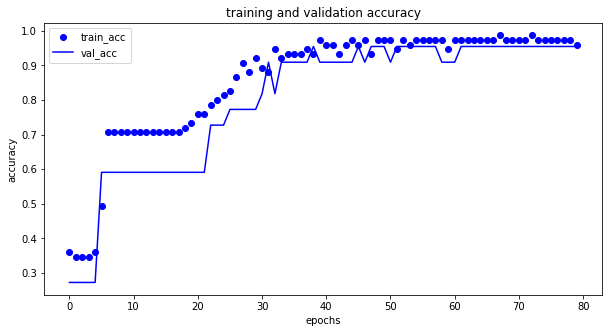

In [344]:
plt.figure(figsize = (10,5))
plt.plot(history.history['accuracy'],'bo')
plt.plot(history.history['val_accuracy'],'b')
plt.title('training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['train_acc','val_acc'],loc= 'upper left')
plt.show()

## prediction

In [180]:
i=52
prediction = model.predict_classes(test_inputs[i].reshape(1,4))

In [181]:
#checking
if prediction == 0:
    print(f'Data = {test_inputs[i]} => Prediction = Setosa => Actual label = {test_labels[i]}')
elif prediction == 1:
    print(f'Data = {test_inputs[i]} => Prediction = Versicolor => Actual label = {test_labels[i]}')
else:
     print(f'Data = {test_inputs[i]} => Prediction = Virginica => Actual label = {test_labels[i]}')

Data = [5.  3.4 1.6 0.4] => Prediction = Setosa => Actual label = Setosa
